# Setup

In [1]:
from __future__ import print_function, division, unicode_literals
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Start
## Creating a Series

In [3]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D ndarray

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [9]:
s2['bob']

83

In [10]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the **loc attribute** when accessing by label, and the **iloc attribute** when accessing by integer location:

In [11]:
s2.loc['bob']

83

In [12]:
s2.iloc[1]

83

In [13]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [14]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [15]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [16]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


In [17]:
surprise_slice.iloc[0]

1002

## Init from dict

In [18]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [19]:
s4 = pd.Series(weights, index=['colin', 'alice'])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
- aligns by matching index label

In [20]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [21]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print('s5 =', s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

In [22]:
meaning = pd.Series(42, index=["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [23]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name='weights')
s6

bob      83
alice    68
Name: weights, dtype: int64

## Ploting a Series

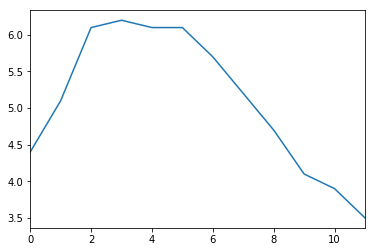

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name='Temperature')
s7.plot()
plt.show()

# Handling time
## Time range

In [25]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
temp_series = pd.Series(temperatures, index=dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

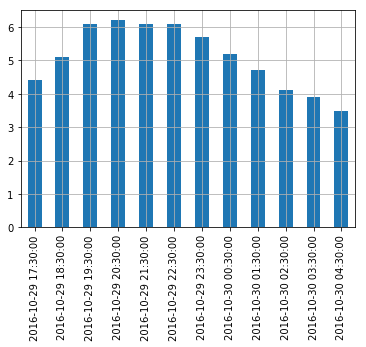

In [27]:
temp_series.plot(kind='bar')
plt.grid(True)
plt.show()

## Resampling

In [28]:
# The resampling operation is actually a deferred operation
temp_series_freq_2H = temp_series.resample('2H')
temp_series_freq_2H

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0]

In [29]:
temp_series_freq_2H = temp_series_freq_2H.mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

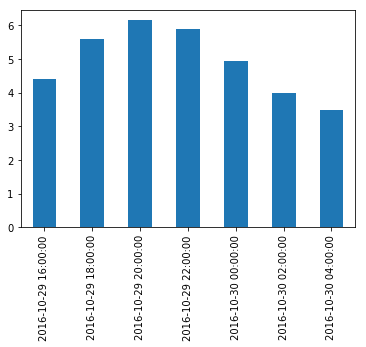

In [30]:
temp_series_freq_2H.plot(kind='bar')
plt.show()

In [31]:
temp_series_freq_2H = temp_series.resample('2H').min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [32]:
temp_series_freq_2H = temp_series.resample('2H').apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation

In [33]:
temp_series_freq_2H = temp_series.resample('15min').apply(np.min)
temp_series_freq_2H.head(10)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [34]:
temp_series_freq_2H = temp_series.resample('15min').apply(np.min).interpolate(method='cubic')
temp_series_freq_2H.head(10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

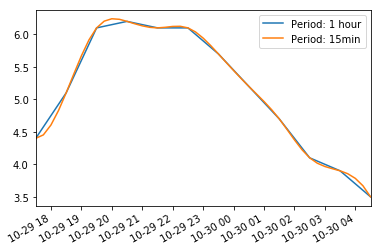

In [35]:
temp_series.plot(label='Period: 1 hour')
temp_series_freq_2H.plot(label='Period: 15min')
plt.legend()
plt.show()

## Timezones

In [36]:
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

In [37]:
temp_series_paris = temp_series_ny.tz_convert('Europe/Paris')
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

In [38]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

In [39]:
try:
    temp_series_paris_naive.tz_localize('Europe/Paris')
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from %r, try using the 'ambiguous' argument


In [40]:
temp_series_paris_naive.tz_localize('Europe/Paris', ambiguous='infer')

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

## Periods
- returns a **PeriodIndex** instead of a **DatetimeIndex**

In [41]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [42]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [43]:
quarters.asfreq('M')

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

In [44]:
quarters.asfreq('M', how='start')

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

In [45]:
quarters.asfreq('A')

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

In [46]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

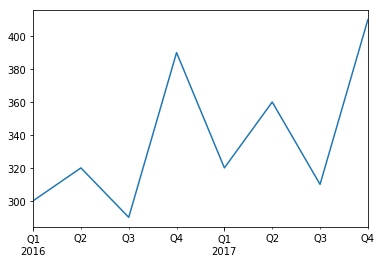

In [47]:
quarterly_revenue.plot(kind='line')
plt.show()

In [48]:
last_hours = quarterly_revenue.to_timestamp(how='end', freq='H')
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
Freq: Q-DEC, dtype: int64

In [49]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

In [50]:
# months_2016 = pd.period_range('2016', periods=12, freq='M')
# one_day_after_last_days = months_2016.asfreq('D') + 1
# last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
# last_bdays.to_period('H') + 9

#By default, the asfreq zooms on the end of each period
month_2016 = pd.period_range('2016', periods=12, freq='M')
one_day_after_last_days = month_2016.asfreq('D', how='end') + 1
last_bday = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
# last_bday.to_timestamp('H') + 9
last_bday.to_period('H') + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

# Dataframe objects
## Creating a DataFrame

In [51]:
people_dict = {
    'weight': pd.Series([68, 83, 112], index=['alice', 'bob', 'charles']),
    'birthyear': pd.Series([1984, 1985, 1992], index=['bob', 'alice', 'charles']),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [52]:
people['birthyear']

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [53]:
people[['birthyear', 'hobby']]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [54]:
d2 = pd.DataFrame(
    people_dict, 
    columns=['birthyear', 'weight', 'height'], 
    index=['bob', 'alice', 'eugene']
)
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [55]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [56]:
# To specify missing values, can either use np.nan or NumPy's masked arrays
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(masked_array, 
                  columns=["birthyear", "children", "hobby", "weight"], 
                  index=["alice", "bob", "charles"])
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [57]:
d4 = pd.DataFrame(
    d3, columns=["hobby", "children"], 
    index=["alice", "bob"]
)
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [58]:
people = pd.DataFrame({
    'birthyear': {'alice': 1985, 'bob': 1984, 'charles': 1992},
    'hobby': {'alice': 'baking', 'bob': 'dancing'},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,baking,68,NaN
bob,1984,dancing,83,3.0
charles,1992,NaN,112,0.0


## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index label.

In [59]:
d5 = pd.DataFrame({
    ('public', 'birthyear'): 
    {('paris', 'alice'): 1985, ('paris', 'bob'): 1984, ('london', 'charles'): 1992},
    ('public', 'hobby'):
    {('paris', 'alice'): 'baking', ('paris', 'bob'): 'dancing'},
    ('private', 'weight'):
    {('paris', 'alice'): 68, ('paris', 'bob'): 83, ('london', 'charles'): 112},
    ('private', 'children'):
     {('paris', 'alice'): np.nan, ('paris', 'bob'): 3, ('london', 'charles'): 0},
})
d5

public          private         
               birthyear    hobby  weight children
london charles      1992      NaN     112      0.0
paris  alice        1985   baking      68      NaN
       bob          1984  dancing      83      3.0

In [60]:
d5['public']

birthyear    hobby
london charles       1992      NaN
paris  alice         1985   baking
       bob           1984  dancing

In [61]:
d5['public', 'hobby']  # same as d5['public']['hobby']

london  charles        NaN
paris   alice       baking
        bob        dancing
Name: (public, hobby), dtype: object

## drop a level
- dropleve()

In [62]:
d5 # two levels of cols, and two levels of rows

public          private         
               birthyear    hobby  weight children
london charles      1992      NaN     112      0.0
paris  alice        1985   baking      68      NaN
       bob          1984  dancing      83      3.0

In [63]:
d5.columns = d5.columns.droplevel(level=0)
d5

birthyear    hobby  weight  children
london charles       1992      NaN     112       0.0
paris  alice         1985   baking      68       NaN
       bob           1984  dancing      83       3.0

In [64]:
d5.index

MultiIndex(levels=[['london', 'paris'], ['alice', 'bob', 'charles']],
           codes=[[0, 1, 1], [2, 0, 1]])

## Transposing

In [65]:
d6 = d5.T
d6

london   paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  baking  dancing
weight        112      68       83
children        0     NaN        3

## Stacking and unstacking levels
- Calling the stack() method will push the lowest column level after the lowest index:

In [66]:
d7 = d6.stack()
d7

london    paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   baking
          bob        NaN  dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN        3
          charles      0      NaN

In [67]:
d8 = d7.unstack()
d8

london                paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  baking  dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

In [68]:
d9 = d8.unstack()  #If we call unstack again, we end up with a Series object
d9

london  alice    birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        bob      birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        charles  birthyear       1992
                 hobby            NaN
                 weight           112
                 children           0
paris   alice    birthyear       1985
                 hobby         baking
                 weight            68
                 children         NaN
        bob      birthyear       1984
                 hobby        dancing
                 weight            83
                 children           3
        charles  birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
dtype: object

In [69]:
# the stack() and unstack() methods let you select the level the stack/unstack

d10 = d9.unstack(level=(0, 1))
d10

london                paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  baking  dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

In [70]:
d9.unstack()

birthyear    hobby weight children
london alice         NaN      NaN    NaN      NaN
       bob           NaN      NaN    NaN      NaN
       charles      1992      NaN    112        0
paris  alice        1985   baking     68      NaN
       bob          1984  dancing     83        3
       charles       NaN      NaN    NaN      NaN

## Most methods return modified copies
As you may have noticed, the stack() and unstack() methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

In [71]:
d6  #e.g. d6 remains unchanged

london   paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  baking  dancing
weight        112      68       83
children        0     NaN        3

## Accessing rows

In [72]:
people

,birthyear,hobby,weight,children
alice,1985,baking,68,NaN
bob,1984,dancing,83,3.0
charles,1992,NaN,112,0.0


In [73]:
people.loc['charles']

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [74]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [75]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,dancing,83,3.0
charles,1992,NaN,112,0.0


In [76]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,baking,68,NaN
charles,1992,NaN,112,0.0


In [77]:
people[people['birthyear'] < 1990]

,birthyear,hobby,weight,children
alice,1985,baking,68,NaN
bob,1984,dancing,83,3.0


## Adding and removing columns

In [78]:
people

,birthyear,hobby,weight,children
alice,1985,baking,68,NaN
bob,1984,dancing,83,3.0
charles,1992,NaN,112,0.0


In [79]:
people['age'] = 2018 - people['birthyear']
people['over 30'] = people['age'] > 30
birthyears = people.pop('birthyear')
del people['children']

people

,hobby,weight,age,over 30
alice,baking,68,33,True
bob,dancing,83,34,True
charles,NaN,112,26,False


In [80]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [81]:
people['pets'] = pd.Series({'bob': 0, 'charles': 5, 'eugene': 1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,baking,68,33,True,NaN
bob,dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


In [82]:
# insert a column anywhere else using the insert() method
people.insert(1, 'height', [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,baking,172,68,33,True,NaN
bob,dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Assigning new columns
You can also creat new columns by callign assign() method. 

**Note**: this returns a new DataFrame object, the origninal is not modified. 

In [83]:
people.assign(
    BMI = people['weight'] / (people['height'] / 100) **2,
    has_pet = people['pets'] > 0
)

,hobby,height,weight,age,over 30,pets,BMI,has_pet
alice,baking,172,68,33,True,NaN,22.985398,False
bob,dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [84]:
try:
    people.assign(
        BMI = people['weight'] / (people['height'] / 100) **2,
        overweight = people['BMI'] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'BMI'


In [85]:
d6 = people.assign(BMI = people['weight'] / (people['height'] / 100) **2)
d6.assign(overweight = d6['BMI'] > 25)

,hobby,height,weight,age,over 30,pets,BMI,overweight
alice,baking,172,68,33,True,NaN,22.985398,False
bob,dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


In [86]:
# NOT WORKING. the people object is not actually modified by the first assignment
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


You can pass a function to the assign() method (typically a lambda function), and this function **will be called with the DataFrame** as a parameter:

In [87]:
(people.assign(BMI = lambda df: df['weight'] / (df['height'] / 100) ** 2)
       .assign(overweight = lambda df: df['BMI'] > 25)
)

,hobby,height,weight,age,over 30,pets,BMI,overweight
alice,baking,172,68,33,True,NaN,22.985398,False
bob,dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Evaluating an expression

In [88]:
people.eval('weight / (height/100) ** 2 > 25')

alice      False
bob         True
charles     True
dtype: bool

In [89]:
people.eval('BMI = weight / (height/100) ** 2', inplace=True)
people

,hobby,height,weight,age,over 30,pets,BMI
alice,baking,172,68,33,True,NaN,22.985398
bob,dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


In [90]:
overweight_threshold = 30
people.eval('overweight = BMI > @overweight_threshold', inplace=True)
people

,hobby,height,weight,age,over 30,pets,BMI,overweight
alice,baking,172,68,33,True,NaN,22.985398,False
bob,dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Querying a DataFrame

In [91]:
people.query('age > 30 and pets == 0')

,hobby,height,weight,age,over 30,pets,BMI,overweight
bob,dancing,181,83,34,True,0.0,25.335002,False


## Sorting a DataFrame
- sort_index(): ascending=, axis=
- sort_values(): by=

In [92]:
people.shape

(3, 8)

In [93]:
people.sort_index(ascending=False) # returns sorted copy of the DataFrame

,hobby,height,weight,age,over 30,pets,BMI,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,dancing,181,83,34,True,0.0,25.335002,False
alice,baking,172,68,33,True,NaN,22.985398,False


In [94]:
people.sort_index(axis=1, inplace=True)
people

,BMI,age,height,hobby,over 30,overweight,pets,weight
alice,22.985398,33,172,baking,True,False,NaN,68
bob,25.335002,34,181,dancing,True,False,0.0,83
charles,32.724617,26,185,NaN,False,True,5.0,112


In [95]:
people.sort_values(by='age', inplace=True)
people

,BMI,age,height,hobby,over 30,overweight,pets,weight
charles,32.724617,26,185,NaN,False,True,5.0,112
alice,22.985398,33,172,baking,True,False,NaN,68
bob,25.335002,34,181,dancing,True,False,0.0,83


## Plotting a DataFrame

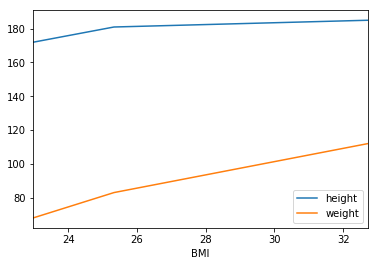

In [96]:
people.sort_values(by='BMI', inplace=True)
people.plot(kind='line', x='BMI', y=['height', 'weight'])
plt.show()

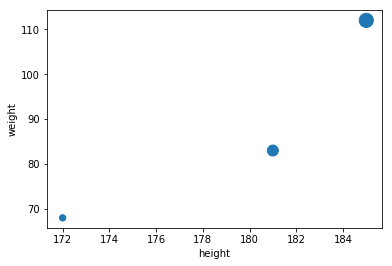

In [97]:
people.plot(kind='scatter', x='height', y='weight', s=[40, 120, 200])
plt.show()

## Operations on DataFrames

In [98]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], 
                      index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [99]:
# element-wise
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [100]:
# broadcasting
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [101]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


**Note**: Aggregate operations, such computing the max, the sum or the mean of a DataFrame, apply to each column and return a Series object

In [102]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [103]:
grades.mean().mean()

8.0

In [104]:
grades.mean(axis=1)

alice      8.333333
bob        9.333333
charles    4.666667
darwin     9.666667
dtype: float64

In [105]:
# all(): checks whether all values are True or not
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional axis parameter which lets you specify along which axis of the DataFrame you want the operation executed. **The default is axis=0**, meaning that the operation is executed **vertically (on each column)**. You can set axis=1 to execute the operation horizontally (on each row). 

In [106]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [107]:
# any(), returns True if any value is True
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a Series object to a DataFrame, pandas attempts to broadcast the operation to all **rows** in the DataFrame. This only works if the Series has the same size of as DataFrame columns

In [108]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [109]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


In [110]:
# substract the global mean from every grade
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Automatic alignment
- pandas automatically aligns them by row index label, but also by column names

In [111]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [112]:
grades + bonus_points  # adding NaN to a number results in NaN

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


## Handling missing data

In [113]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [114]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, 'sep', 0)
fixed_bonus_points.loc['alice'] = 0
(grades + fixed_bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,9.0,8.0,8.0
bob,0.0,9.0,9.0,10.0
charles,0.0,5.0,11.0,4.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,9.0


In [115]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [116]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, 'sep', 0)
better_bonus_points.loc['alice'] = 0
better_bonus_points.interpolate(axis=1, inplace=True)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [117]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [118]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [119]:
#  dropna() method to get rid of rows that are full of NaNs
final_grades_clean = final_grades.dropna(how='all')
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [120]:
final_grades_clean = final_grades_clean.dropna(how='all', axis=1)
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Aggregating with groupby

In [121]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [122]:
grouped_grades = final_grades.groupby('hobby')
grouped_grades

In [123]:
grouped_grades.mean()  # Note that the NaN values have simply been skipped when computing the means.

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


## Pivot tables

In [124]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [125]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades['bonus'] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


In [126]:
pd.pivot_table(more_grades, index='name')  # pivot_table() computes the mean of each numeric column by default

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [127]:
pd.pivot_table(more_grades, index='name', values=['grade', 'bonus'], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [128]:
pd.pivot_table(more_grades, index='name', columns='month', margins=True, values='grade')

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [129]:
pd.pivot_table(more_grades, index=('name', 'month'), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## Overview functions

In [130]:
much_data = np.fromfunction(lambda x, y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, 'some_text', 'Blabla')
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


In [131]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [132]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [133]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

In [134]:
large_df.describe()  # return statistics of not NaN values over each column

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Saving & loading

In [135]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Saving

In [136]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [137]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print('#', filename)
    with open(filename, 'rt') as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [138]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

No module named 'openpyxl'


## Loading

In [139]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [140]:
us_cities = None
try:
    csv_url = 'http://simplemaps.com/files/cities.csv'
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

HTTP Error 403: Forbidden


# Combining DataFrames
## SQL-like joins

In [141]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [142]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [143]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [144]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how='outer')
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


In [145]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


**Note**: If the key to join on is actually in one (or both) DataFrame's index, you must use **left_index=True and/or right_index=True**. 

In [146]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation

In [147]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


In [148]:
result_concat.loc[3]

,city,lat,lng,population,state
3,Cleveland,41.473508,-81.739791,NaN,OH
3,San Francisco,NaN,NaN,808976.0,California


In [149]:
pd.concat([city_loc, city_pop], ignore_index=True)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
5,San Francisco,NaN,NaN,808976.0,California
6,New York,NaN,NaN,8363710.0,New-York
7,Miami,NaN,NaN,413201.0,Florida
8,Houston,NaN,NaN,2242193.0,Texas


In [150]:
pd.concat([city_loc, city_pop], join='inner')

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


In [151]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In [152]:
pd.concat([city_loc.set_index('city'), city_pop.set_index('city')], axis=1)

,state,lat,lng,population,state
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas
Miami,FL,25.791100,-80.320733,413201.0,Florida
New York,NY,40.705649,-74.008344,8363710.0,New-York
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976.0,California


In [153]:
# The append() method is a useful shorthand for concatenating DataFrames vertically
# the append() method does not actually modify city_loc: it works on a copy and returns the modified copy.
city_loc.append(city_pop)

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


## Categories

In [154]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [155]:
city_eco['economy'] = city_eco['eco_code'].astype('category')
city_eco['economy'].cat.categories

Int64Index([17, 20, 34], dtype='int64')

In [156]:
city_eco['economy'].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


In [157]:
city_eco.sort_values(by='economy', ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance
